In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 91% 144M/158M [00:01<00:00, 110MB/s]
100% 158M/158M [00:01<00:00, 94.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 batch_normalization_13 (Ba  (None, 252, 252, 64)      256       
 tchNormalization)                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 250, 250, 128)     73856     
                                                                 
 batch_normalization_14 (Ba  (None, 250, 250, 128)    

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
8/8 [==============================] - 354s 43s/step - loss: 89.2079 - accuracy: 0.6853 - val_loss: 56.4617 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 327s 41s/step - loss: 34.5370 - accuracy: 0.8765 - val_loss: 155.6587 - val_accuracy: 0.3939
Epoch 3/10
8/8 [==============================] - 343s 43s/step - loss: 31.6913 - accuracy: 0.8765 - val_loss: 275.7817 - val_accuracy: 0.3939
Epoch 4/10
8/8 [==============================] - 341s 43s/step - loss: 19.6005 - accuracy: 0.9084 - val_loss: 284.0995 - val_accuracy: 0.3939
Epoch 5/10
8/8 [==============================] - 322s 40s/step - loss: 8.9790 - accuracy: 0.9442 - val_loss: 495.0744 - val_accuracy: 0.3939
Epoch 6/10
8/8 [==============================] - 319s 40s/step - loss: 19.6505 - accuracy: 0.9283 - val_loss: 770.4556 - val_accuracy: 0.3939
Epoch 7/10
8/8 [==============================] - 320s 40s/step - loss: 10.4699 - accuracy: 0.9562 - val_loss: 1033.6364 - val_accuracy: 0.3939


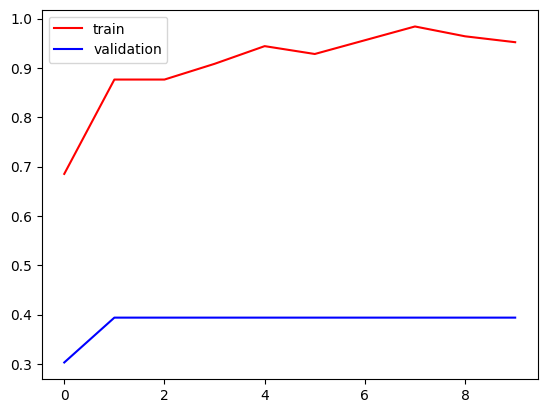

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

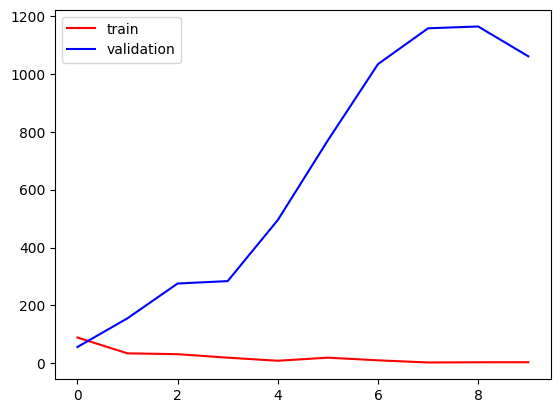

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/image1.jpg')

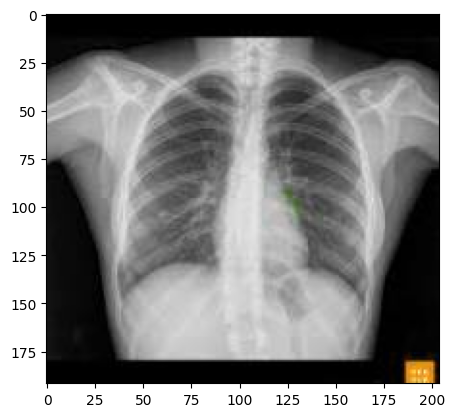

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(192, 204, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 786ms/step


array([[0., 1., 0.]], dtype=float32)